# FINAL PROJECT
### Isabella Parlato
### Date: December 13, 2024

## Prompt

You are a data scientist and would like to know where the top 5 places in the world (country or city) where your salary (in USD) will go the farthest with respect to each individual index within the cost_of_living.csv file. Provide a simple statistical analysis in a Jupyter Notebook file and provide visualizations to support your analysis (I am looking for data wrangling more than anything). 

There are several ways to convert currencies to USD. Here are some examples in Python: https://pytutorial.com/currency-conversion-in-python


In [1]:
# import libraries

import numpy as np
import pandas as pd
import string as str
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# confirm working directory and change to project folder with data

import os
os.chdir(r"C:\Users\bells\OneDrive\Documents\MS Data Sci GRAD SCHOOL\DSE5002_R-Python\Project_2_python\data")

import os
print(os.getcwd())         

C:\Users\bells\OneDrive\Documents\MS Data Sci GRAD SCHOOL\DSE5002_R-Python\Project_2_python\data


## Add In Data Sets & Clean Them Up

In [3]:
top_countries_women = pd.read_excel('best_countries_women_2024.xlsx')
print(top_countries_women.head())

## I pulled this data from https://ceoworld.biz/2024/04/15/revealed-worlds-best-countries-for-women-2024/

   Country Rankings as Best for Women      Country  \
0                                   1  Netherlands   
1                                   2       Norway   
2                                   3       Sweden   
3                                   4      Denmark   
4                                   5      Finland   

   Country Score as Best for Women  
0                             99.7  
1                             99.4  
2                             99.2  
3                             98.7  
4                             98.3  


In [4]:
cost_of_living = pd.read_csv('cost_of_living.csv')
print (cost_of_living.head())

   Rank                 City  Cost of Living Index  Rent Index  \
0   NaN    Hamilton, Bermuda                149.02       96.10   
1   NaN  Zurich, Switzerland                131.24       69.26   
2   NaN   Basel, Switzerland                130.93       49.38   
3   NaN     Zug, Switzerland                128.13       72.12   
4   NaN  Lugano, Switzerland                123.99       44.99   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          124.22           157.89                  155.22   
1                          102.19           136.14                  132.52   
2                           92.70           137.07                  130.95   
3                          101.87           132.61                  130.93   
4                           86.96           129.17                  119.80   

   Local Purchasing Power Index  
0                         79.43  
1                        129.79  
2                        111.53 

In [5]:
## cleaning up cost of living df - I want to take only the Countries from the City column by just taking last word

cost_of_living['Country'] = cost_of_living['City'].str.split(',').str[-1]

#then remove any spaces so it will line up with out data set's Country columns

cost_of_living['Country'] = cost_of_living['Country'].str.strip()

print(cost_of_living.head())
print(cost_of_living.columns)

   Rank                 City  Cost of Living Index  Rent Index  \
0   NaN    Hamilton, Bermuda                149.02       96.10   
1   NaN  Zurich, Switzerland                131.24       69.26   
2   NaN   Basel, Switzerland                130.93       49.38   
3   NaN     Zug, Switzerland                128.13       72.12   
4   NaN  Lugano, Switzerland                123.99       44.99   

   Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                          124.22           157.89                  155.22   
1                          102.19           136.14                  132.52   
2                           92.70           137.07                  130.95   
3                          101.87           132.61                  130.93   
4                           86.96           129.17                  119.80   

   Local Purchasing Power Index      Country  
0                         79.43      Bermuda  
1                        129.79  Switzer

In [6]:
## now to delete unnecessary columns in cost of living df

cost_of_living = cost_of_living.drop(columns=['City','Rank'])
print(cost_of_living.head())

   Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                149.02       96.10                          124.22   
1                131.24       69.26                          102.19   
2                130.93       49.38                           92.70   
3                128.13       72.12                          101.87   
4                123.99       44.99                           86.96   

   Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0           157.89                  155.22                         79.43   
1           136.14                  132.52                        129.79   
2           137.07                  130.95                        111.53   
3           132.61                  130.93                        143.40   
4           129.17                  119.80                        111.96   

       Country  
0      Bermuda  
1  Switzerland  
2  Switzerland  
3  Switzerland  
4  Switzerland  


In [7]:
country_codes = pd.read_excel('country_codes.xlsx')
print(country_codes.head())
print(country_codes.columns)

          Country Alpha-2 code Alpha-3 code  Numeric
0     Afghanistan           AF          AFG        4
1         Albania           AL          ALB        8
2         Algeria           DZ          DZA       12
3  American Samoa           AS          ASM       16
4         Andorra           AD          AND       20
Index(['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric'], dtype='object')


In [8]:
## now to clean up the country codes df

country_codes = country_codes.drop(columns=['Numeric'])
country_codes.rename(columns={'Alpha-2 code': 'Country Code_2 Letters', 'Alpha-3 code': 'Country Code_3 Letters'}, inplace=True)
print(country_codes.head())

          Country Country Code_2 Letters Country Code_3 Letters
0     Afghanistan                     AF                    AFG
1         Albania                     AL                    ALB
2         Algeria                     DZ                    DZA
3  American Samoa                     AS                    ASM
4         Andorra                     AD                    AND


In [9]:
ds_salaries = pd.read_csv('ds_salaries.csv')
print(ds_salaries.head())
print(ds_salaries.columns)

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

In [10]:
## now to clean up ds_salaries df

ds_salaries.drop(columns=['Unnamed: 0','work_year', 'experience_level', 'employment_type','salary', 'salary_currency','remote_ratio', 'company_location',
       'company_size'], inplace=True)
print(ds_salaries.columns)


Index(['job_title', 'salary_in_usd', 'employee_residence'], dtype='object')


In [11]:
## now that it's down to 3 columns, I want to only keep the data science roles then delete job_titles

ds_salaries = ds_salaries[ds_salaries['job_title'] == 'Data Scientist']
ds_salaries.drop(columns=['job_title'], inplace=True)
print(ds_salaries.head())

    salary_in_usd employee_residence
0           79833                 DE
7           35735                 HU
10          51321                 FR
11          40481                 IN
12          39916                 FR


In [12]:
levels_fyi_salaries = pd.read_csv('levels_fyi_salary_data.csv')
print(levels_fyi_salaries.head())
print(levels_fyi_salaries.columns)

            timestamp    company level                         title  \
0   6/7/2017 11:33:27     Oracle    L3               Product Manager   
1  6/10/2017 17:11:29       eBay  SE 2             Software Engineer   
2  6/11/2017 14:53:57     Amazon    L7               Product Manager   
3   6/17/2017 0:23:14      Apple    M1  Software Engineering Manager   
4  6/20/2017 10:58:51  Microsoft    60             Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   127000   Redwood City, CA                1.5   
1                   100000  San Francisco, CA                5.0   
2                   310000        Seattle, WA                8.0   
3                   372000      Sunnyvale, CA                7.0   
4                   157000  Mountain View, CA                5.0   

   yearsatcompany  tag  basesalary  ...  Doctorate_Degree  Highschool  \
0             1.5  NaN    107000.0  ...                 0           0   
1           

In [13]:
## now I want to clean up levels_fyi_salaries to remove some of the unnecessary columns

levels_fyi_salaries.drop(columns=['timestamp', 'company', 'level','yearsofexperience', 'yearsatcompany', 'tag', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 
       'Race_Black', 'Race_Hispanic', 'Race', 'Education'], inplace=True)
print(levels_fyi_salaries.head())

                          title  totalyearlycompensation           location  \
0               Product Manager                   127000   Redwood City, CA   
1             Software Engineer                   100000  San Francisco, CA   
2               Product Manager                   310000        Seattle, WA   
3  Software Engineering Manager                   372000      Sunnyvale, CA   
4             Software Engineer                   157000  Mountain View, CA   

   basesalary  stockgrantvalue    bonus  
0    107000.0          20000.0  10000.0  
1         0.0              0.0      0.0  
2    155000.0              0.0      0.0  
3    157000.0         180000.0  35000.0  
4         0.0              0.0      0.0  


In [14]:
## want to just narrow levels_fyi_salaries down to data scientists only

levels_fyi_salaries = levels_fyi_salaries[levels_fyi_salaries['title'] == 'Data Scientist']
levels_fyi_salaries.drop(columns=['title'], inplace=True)
print(levels_fyi_salaries.head())


     totalyearlycompensation           location  basesalary  stockgrantvalue  \
419                   233000  San Francisco, CA    162000.0         220000.0   
440                   218000        Seattle, WA    165000.0          28000.0   
444                   180000       San Jose, CA         0.0              0.0   
454                   500000  San Francisco, CA    200000.0         280000.0   
495                   370000        Seattle, WA    190000.0         140000.0   

       bonus  
419  10000.0  
440  23000.0  
444      0.0  
454  20000.0  
495  40000.0  


In [15]:
## seems like for location, US only has city, state while other countries have it after 3rd comma so want to get down to only countries column

## step 1 - separate into 3 columns by comma
levels_fyi_salaries[['City', 'State/County', 'Country']] = levels_fyi_salaries['location'].str.split(',', expand=True)

## step 2 - clear up any extra spaces that may have pulled
levels_fyi_salaries['City'] = levels_fyi_salaries['City'].str.strip()
levels_fyi_salaries['State/County'] = levels_fyi_salaries['State/County'].str.strip()
levels_fyi_salaries['Country'] = levels_fyi_salaries['Country'].str.strip()

## step 3 - since the US rows will pull blank to 3rd row, want to replace blank with US
levels_fyi_salaries['Country'] = levels_fyi_salaries['Country'].fillna('United States')

## step 4 - this should account for any missing data after filling above so want to set this to US as well just in case
levels_fyi_salaries['Country'] = levels_fyi_salaries['Country'].replace('', 'United States')

## step 5 - now to drop the other unnecessary columns to leave Country only
levels_fyi_salaries.drop(columns=['City', 'State/County', 'location'], inplace=True)

## finally print to see if it worked
print(levels_fyi_salaries)

       totalyearlycompensation  basesalary  stockgrantvalue    bonus  \
419                     233000    162000.0         220000.0  10000.0   
440                     218000    165000.0          28000.0  23000.0   
444                     180000         0.0              0.0      0.0   
454                     500000    200000.0         280000.0  20000.0   
495                     370000    190000.0         140000.0  40000.0   
...                        ...         ...              ...      ...   
62240                   155000    141000.0              0.0  14000.0   
62283                   150000    150000.0          30000.0  30000.0   
62285                   185000    150000.0          20000.0  15000.0   
62529                   685000    221000.0         296000.0  55000.0   
62623                   175000    135000.0          29000.0  11000.0   

             Country  
419    United States  
440    United States  
444    United States  
454    United States  
495    United States

## Merging Data Sets

In [16]:
## In order to figure out how to join them, I want to see what columns they have in common

print('This is for the top_countries_women data set', top_countries_women.columns)
print(top_countries_women.head())

print('This is for the cost_of_living data set', cost_of_living.columns)
print(cost_of_living.head())

print('This is for the country_codes data set', country_codes.columns)
print(country_codes.head())

print('This is for the ds_salaries data set', ds_salaries.columns)
print(ds_salaries.head())

print('This is for the levels_fyi_salaries data set', levels_fyi_salaries.columns)
print(levels_fyi_salaries.head())


This is for the top_countries_women data set Index(['Country Rankings as Best for Women', 'Country',
       'Country Score as Best for Women'],
      dtype='object')
   Country Rankings as Best for Women      Country  \
0                                   1  Netherlands   
1                                   2       Norway   
2                                   3       Sweden   
3                                   4      Denmark   
4                                   5      Finland   

   Country Score as Best for Women  
0                             99.7  
1                             99.4  
2                             99.2  
3                             98.7  
4                             98.3  
This is for the cost_of_living data set Index(['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index', 'Country'],
      dtype='object')
   Cost of Living Index  Rent Index  Cost o

In [17]:
## full join for top_countries_women AND cost_of_living to create:  costs_top_countries_women 

costs_top_countries_women = pd.merge(cost_of_living, top_countries_women, how= 'outer', on= 'Country')
print(costs_top_countries_women)
print(costs_top_countries_women.columns)


     Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                   21.35        3.17                           12.83   
1                   38.68       11.33                           25.86   
2                   29.84        6.67                           18.98   
3                     NaN         NaN                             NaN   
4                     NaN         NaN                             NaN   
..                    ...         ...                             ...   
621                 39.01       17.85                           29.09   
622                 36.85       12.21                           25.30   
623                   NaN         NaN                             NaN   
624                 33.57       10.18                           22.60   
625                 45.69        9.56                           28.75   

     Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0              15.22                   14.85 

In [18]:
## full join for costs_top_countries_women & country_codes to create:  costs_top_countries_women_codes

costs_top_countries_women_codes = pd.merge(costs_top_countries_women, country_codes, how= 'outer', on= 'Country')
print(costs_top_countries_women_codes)
print(costs_top_countries_women_codes.columns)


     Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                   21.35        3.17                           12.83   
1                   38.68       11.33                           25.86   
2                   29.84        6.67                           18.98   
3                     NaN         NaN                             NaN   
4                     NaN         NaN                             NaN   
..                    ...         ...                             ...   
726                   NaN         NaN                             NaN   
727                   NaN         NaN                             NaN   
728                 33.57       10.18                           22.60   
729                 45.69        9.56                           28.75   
730                   NaN         NaN                             NaN   

     Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0              15.22                   14.85 

In [19]:
## full join for costs_top_countries_women_codes & levels_fyi_salaries to create:  women_costs_codes_levels

women_costs_codes_levels = pd.merge(costs_top_countries_women_codes, levels_fyi_salaries, how= 'outer', on= 'Country')
print(women_costs_codes_levels)
print(women_costs_codes_levels.columns)



        Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                      21.35        3.17                           12.83   
1                      38.68       11.33                           25.86   
2                      29.84        6.67                           18.98   
3                        NaN         NaN                             NaN   
4                        NaN         NaN                             NaN   
...                      ...         ...                             ...   
221014                   NaN         NaN                             NaN   
221015                   NaN         NaN                             NaN   
221016                 33.57       10.18                           22.60   
221017                 45.69        9.56                           28.75   
221018                   NaN         NaN                             NaN   

        Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0     

In [20]:
## full join for women_costs_codes_levels & levels_fyi_salaries to create:  women_costs_codes_levels_ds_salaries

women_costs_codes_levels_ds_salaries = pd.merge(women_costs_codes_levels, 
                                                ds_salaries, 
                                                how= 'outer', 
                                                left_on= 'Country Code_2 Letters', 
                                                right_on= 'employee_residence')
print(women_costs_codes_levels_ds_salaries)
print(women_costs_codes_levels_ds_salaries.columns)



        Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
0                        NaN         NaN                             NaN   
1                        NaN         NaN                             NaN   
2                      21.35        3.17                           12.83   
3                        NaN         NaN                             NaN   
4                        NaN         NaN                             NaN   
...                      ...         ...                             ...   
268618                 55.92       23.17                           40.56   
268619                 55.92       23.17                           40.56   
268620                 45.31       12.08                           29.73   
268621                 39.01       17.85                           29.09   
268622                 36.85       12.21                           25.30   

        Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
0     

## Cleaning up fully merged data set containing the 5 dataframes

In [21]:
## now to pull out as csv to see what it looks like externally

women_costs_codes_levels_ds_salaries.to_csv('women_costs_codes_levels_ds_salaries.csv', index=False)


In [22]:
## now to filter since I would only plan on living in any of the 20 top countries for women (the US is ranked 20)

## originally got an error since 'Country Rankings as Best for Women' was stored as a string and not an int so need to convert it to filter first

women_costs_codes_levels_ds_salaries['Country Rankings as Best for Women'] = pd.to_numeric(
    women_costs_codes_levels_ds_salaries['Country Rankings as Best for Women'],
    errors='coerce')

## using coerce should convert any non-convertible values back to NaN

top_20_cost_of_living_salaries = women_costs_codes_levels_ds_salaries[women_costs_codes_levels_ds_salaries['Country Rankings as Best for Women'] <= 20]
print(top_20_cost_of_living_salaries)
print(top_20_cost_of_living_salaries.columns)


        Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
11                     77.32       30.14                           55.20   
12                     74.59       22.54                           50.19   
13                     73.55       26.48                           51.49   
14                     70.53       32.15                           52.54   
15                     68.36       34.66                           52.56   
...                      ...         ...                             ...   
268615                 55.92       23.17                           40.56   
268616                 55.92       23.17                           40.56   
268617                 55.92       23.17                           40.56   
268618                 55.92       23.17                           40.56   
268619                 55.92       23.17                           40.56   

        Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
11    

In [23]:
## now to drop some of the columns that I don't plan on using (since country had 0 NaN, removing alpha codes)

top_20_cost_of_living_salaries = top_20_cost_of_living_salaries.drop(columns=['Country Code_2 Letters', 'Country Code_3 Letters', 'stockgrantvalue', 'bonus', 'employee_residence'])
print(top_20_cost_of_living_salaries.columns)


Index(['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index', 'Country',
       'Country Rankings as Best for Women', 'Country Score as Best for Women',
       'totalyearlycompensation', 'basesalary', 'salary_in_usd'],
      dtype='object')


In [24]:
## I want to use 'totalyearlycompensation' and/or 'salary_in_usd' and/or 'basesalary' to compare to costs so I want to combine them into 1 grabbing max

top_20_cost_of_living_salaries['DS Salary'] = top_20_cost_of_living_salaries[['salary_in_usd', 'totalyearlycompensation', 'basesalary']].max(axis=1)
print(top_20_cost_of_living_salaries)
print(top_20_cost_of_living_salaries.isna().sum())

        Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
11                     77.32       30.14                           55.20   
12                     74.59       22.54                           50.19   
13                     73.55       26.48                           51.49   
14                     70.53       32.15                           52.54   
15                     68.36       34.66                           52.56   
...                      ...         ...                             ...   
268615                 55.92       23.17                           40.56   
268616                 55.92       23.17                           40.56   
268617                 55.92       23.17                           40.56   
268618                 55.92       23.17                           40.56   
268619                 55.92       23.17                           40.56   

        Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
11    

In [25]:
## now to drop the 3 columns I combined into the new DS Salary Column

top_20_cost_of_living_salaries = top_20_cost_of_living_salaries.drop(columns=['salary_in_usd', 'totalyearlycompensation', 'basesalary'])
print(top_20_cost_of_living_salaries.columns)


Index(['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index', 'Country',
       'Country Rankings as Best for Women', 'Country Score as Best for Women',
       'DS Salary'],
      dtype='object')


In [26]:
top_20_cost_of_living_salaries.to_csv('top_20_cost_of_living_salaries.csv', index=False)

## Comparing DS Salary to Cost of Living Indexes

In [27]:
## going to try to a loop to run through all 6 indexes in comparison to DS Salary and create new columns for comparison

for indexes in [
    'Cost of Living Index' 
    ,'Rent Index' 
    ,'Cost of Living Plus Rent Index'
    ,'Groceries Index'
    ,'Restaurant Price Index'
    ,'Local Purchasing Power Index'
]:

    top_20_cost_of_living_salaries[f'How far Salary will go for {indexes}'] = top_20_cost_of_living_salaries['DS Salary'] / top_20_cost_of_living_salaries[indexes]

## colon after bracket to signify start of loop body

print(top_20_cost_of_living_salaries.head())

## by dividing salary by cost of living index, those resulting values should be how many times your salary exceeds the value of the index
## basically results show number of times salary can pay for cost given by index. higher number means salary is much greater than costs

    Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
11                 77.32       30.14                           55.20   
12                 74.59       22.54                           50.19   
13                 73.55       26.48                           51.49   
14                 70.53       32.15                           52.54   
15                 68.36       34.66                           52.56   

    Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
11            66.32                   79.87                         68.01   
12            70.69                   62.68                         79.03   
13            67.58                   75.39                         78.35   
14            66.99                   68.46                         77.81   
15            61.71                   66.93                         79.56   

    Country  Country Rankings as Best for Women  \
11  Austria                                12.0   
12

f-string (AKA f used above in body)

I wanted something so I didn't have to go through each index individually and type out a new column name every time (or copy and paste it) and then have to keep going through same function. This feature is supposed to simplify the process of doing that in strings. I guess other ways to do this same thing are modulo operator (%), which is older, or str.format() method. But since this f-string method seemed shorter (and newer) I figured I'd see if I could get it to work correctly

Resources:
"f-strings in Python" by Geeks for Geeks - https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/
"Python's F-String for String Interpolation and Formatting" by Joanna Jablonski - https://realpython.com/python-f-strings/


In [28]:

print(top_20_cost_of_living_salaries.sum())


Cost of Living Index                                                                                16610166.9
Rent Index                                                                                         10344664.62
Cost of Living Plus Rent Index                                                                      13673117.3
Groceries Index                                                                                    16672206.55
Restaurant Price Index                                                                             16400904.22
Local Purchasing Power Index                                                                       26299302.67
Country                                                      AustriaAustriaAustriaAustriaAustriaAustraliaAu...
Country Rankings as Best for Women                                                                   4362511.0
Country Score as Best for Women                                                                    20622696.76
D

In [31]:
## okay so now i want to try using groupby to try to get country mean per cost of living how far columns

country_means = top_20_cost_of_living_salaries.groupby('Country').mean(numeric_only=True)

print(country_means)
print(country_means.columns)

                Cost of Living Index  Rent Index  \
Country                                            
Australia                  77.601000   39.267000   
Austria                    72.870000   29.194000   
Canada                     71.959643   36.316786   
Denmark                    84.295000   34.385000   
Finland                    76.100000   28.778000   
France                     77.741667   31.056667   
Germany                    67.281154   28.933846   
Italy                      67.687368   22.963158   
Japan                      79.313333   43.150000   
Luxembourg                 82.990000   63.430000   
Netherlands                76.229286   37.622143   
New Zealand                75.362000   36.112000   
Norway                    101.148000   38.308000   
Portugal                   48.445000   22.761250   
Singapore                  83.980000   66.430000   
Spain                      54.757857   22.733571   
Sweden                     75.460000   31.642000   
Switzerland 

In [32]:
## since that pulled the mean for all columns by County (now an index/row header) going to drop some unneeded columns again

country_means = country_means.drop(columns=['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
                                            'Groceries Index', 'Restaurant Price Index',
                                            'Local Purchasing Power Index', 'DS Salary'])
print(country_means.columns)


Index(['Country Rankings as Best for Women', 'Country Score as Best for Women',
       'How far Salary will go for Cost of Living Index',
       'How far Salary will go for Rent Index',
       'How far Salary will go for Cost of Living Plus Rent Index',
       'How far Salary will go for Groceries Index',
       'How far Salary will go for Restaurant Price Index',
       'How far Salary will go for Local Purchasing Power Index'],
      dtype='object')


In [34]:
print(country_means)

                Country Rankings as Best for Women  \
Country                                              
Australia                                     16.0   
Austria                                       12.0   
Canada                                         6.0   
Denmark                                        4.0   
Finland                                        5.0   
France                                         9.0   
Germany                                       10.0   
Italy                                         13.0   
Japan                                         15.0   
Luxembourg                                    11.0   
Netherlands                                    1.0   
New Zealand                                    8.0   
Norway                                         2.0   
Portugal                                      18.0   
Singapore                                     19.0   
Spain                                         14.0   
Sweden                      

### Summary of the Top 6 Countries in each Cost of Living Categories

Cost of Living Index
1. United States
2. United Kingdom
3. France
4. Australia
5. Canada
6. Singapore

Rent Index
1. France
2. United States
3. United Kingdom
4. Germany
5. Australia
6. Canada

Cost of Living Plus Rent Index
1. United States
2. France
3. United Kingdom
4. Australia
5. Germany
6. Canada

Groceries Index
1. United States
2. United Kingdom
3. France
4. Germany
5. Australia
6. Singapore

Restaurant Price Index
1. United States
2. Singapore
3. France
4. United Kingdom
5. Australia
6. Canada

Local Purchasing Power Index
1. France
2. United States
3. United Kingdom
4. Singapore
5. Canada
6. Switzerland

Reminder of Where the Countries that were named in the top 6 for each category place as Best for Women in 2024
                                             
Australia  16.0   
Canada     6.0   
France     9.0   
Germany    10.0      
Singapore  19.0   
Switzerland   7.0   
United Kingdom 17.0   
United States  20.0   



## Visualizations

In [67]:
# need to melt to long form since i think that will make ploting easier

top_20_cost_of_living_salaries_melt = top_20_cost_of_living_salaries.melt(id_vars= ['Country', 'Country Rankings as Best for Women']
                                        ,value_vars= ['How far Salary will go for Cost of Living Index'
                                                      ,'How far Salary will go for Rent Index'
                                                      ,'How far Salary will go for Cost of Living Plus Rent Index'
                                                      ,'How far Salary will go for Groceries Index'
                                                      ,'How far Salary will go for Restaurant Price Index'
                                                      ,'How far Salary will go for Local Purchasing Power Index']
                                        ,var_name= 'Index'
                                        ,value_name= 'How Far Salary Covers')

print(top_20_cost_of_living_salaries_melt)    
print(top_20_cost_of_living_salaries_melt.columns)

               Country  Country Rankings as Best for Women  \
0              Austria                                12.0   
1              Austria                                12.0   
2              Austria                                12.0   
3              Austria                                12.0   
4              Austria                                12.0   
...                ...                                 ...   
1363909  United States                                20.0   
1363910  United States                                20.0   
1363911  United States                                20.0   
1363912  United States                                20.0   
1363913  United States                                20.0   

                                                     Index  \
0          How far Salary will go for Cost of Living Index   
1          How far Salary will go for Cost of Living Index   
2          How far Salary will go for Cost of Living Index   
3      

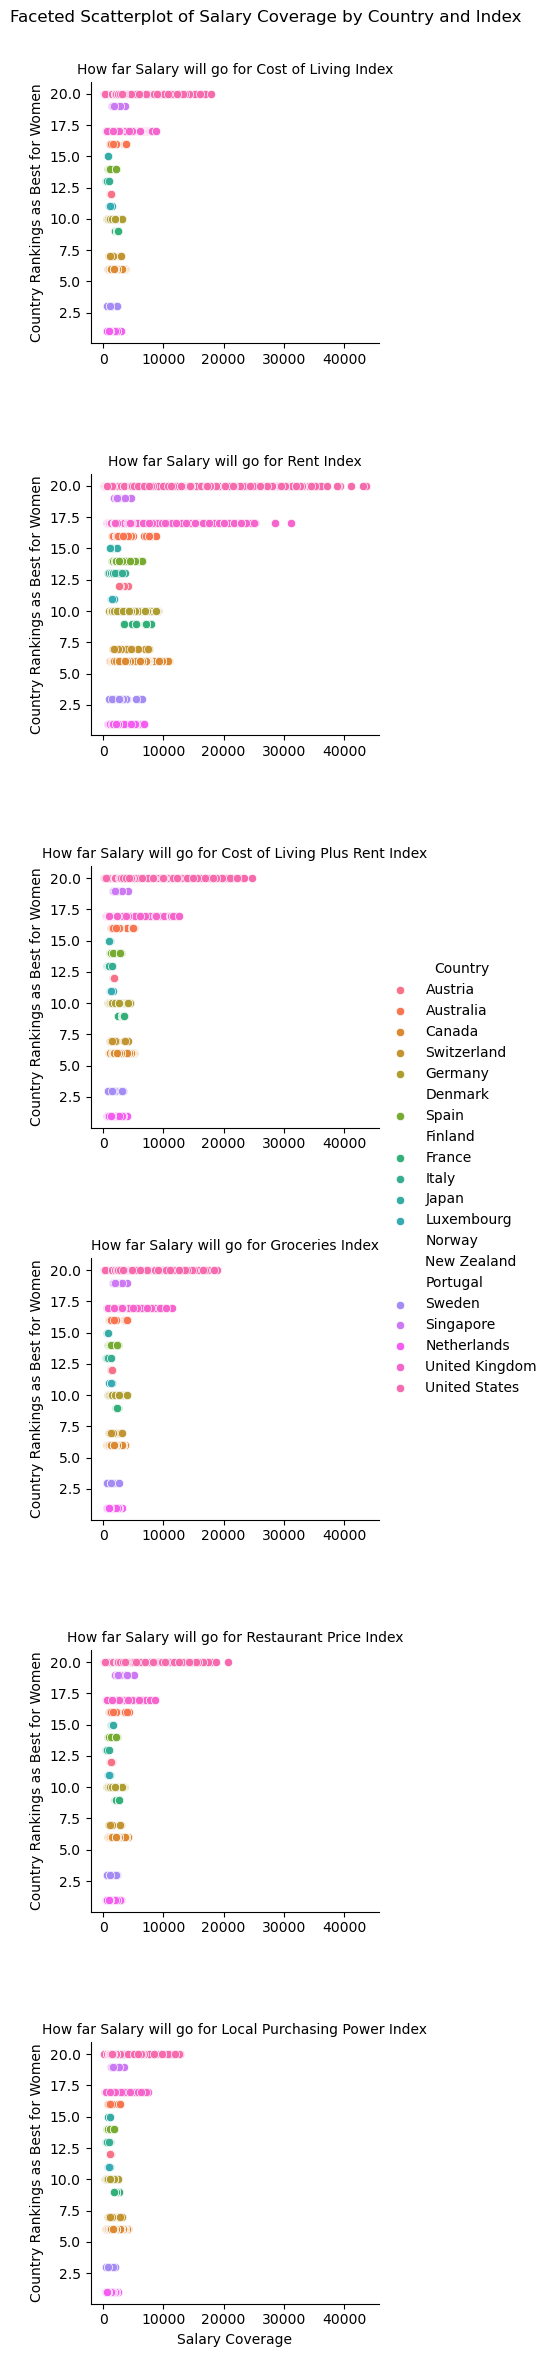

In [52]:
## Scatterplot faceted

g = sns.FacetGrid(top_20_cost_of_living_salaries_melt, col='Index', hue='Country', height=4, aspect=1, col_wrap=1)
g.map(sns.scatterplot, 'How Far Salary Covers', 'Country Rankings as Best for Women')
g.add_legend()
g.set_titles(col_template='{col_name}')

g.fig.suptitle('Faceted Scatterplot of Salary Coverage by Country and Index')

# below should make it so the labels so on every facet and not just bottom one
g.set_axis_labels('Salary Coverage', 'Country Rankings as Best for Women')
g.tick_params(axis='x', labelbottom=True)

# below fixes space between stacked faceted plots
plt.subplots_adjust(hspace=0.5, top=0.95)

plt.show()

## Final Thoughts/Analysis of my Top Five Countries

After reviewing the data and taking into account my personal preferences, my list of the five (5) countries would be as follows where I would consider moving to:
1. Canada
2. France
3. Australia
4. Singapore
5. United Kingdom

I already went into this knowing that I wouldn't plan on living in any country where it isn't great to be a women in that environment. So since the United States ranked #20 on that list of Best Countries for Women in 2024, I wouldn't plan on settling for less than what I'm used to. After reviewing the means by Country for each of the Cost of Living Indexes, I ended up with eight (8) countries that ended up being named as one of the top six (6) in at least one of the categories. 

The United States seemingly did well in most categories but that might also be because of it likely having the most salary data available to work with so any outliers wouldn't have made too much of an impact. I left it off my list because I would love to travel more and living out of the United States for a bit is one of my goals. Switzerland only appeared in Local Purchasing Power Index as rank #6 so since it wasn't consistently in any of the other lists, I ruled it out from my list. I didn't put Germany on my list because recently I went on a trip to Costa Rica this fall and my roommate for the trip was a German woman, who was incredibly difficult to deal with. Thus, due to my recent poor experience, I'm not trying to go to Germany anytime soon.

I've been to Canada and Australia before and had great times in both. There's definitely a lot left of both countries that I would love to explore so they made my list. France did well in the means lists and I've heard good things about the amount of vacation time that employers give so that country ended up on my list as well. I think the United Kingdom would be fun to explore and an easy transition to live in given that English is the primary language there. Finally, I put Singapore since I've always wanted to travel there. It's stunningly beautiful in all of the pictures that I've seen so to have the opportunity to work there and see the country for myself would be pretty amazing.
